In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import ticker, colors, cm
import matplotlib as mpl
from scipy.interpolate import LinearNDInterpolator

In [2]:
# TODO: write one to read the originial FRIED data?

In [3]:
class FRIED():

    def __init__(self, mstar=0.1, pah=0.1, dust=True, fuv=10):
        
        self.mstar = mstar
        self.pah_ratio = pah
        self.dust_grow = dust
        self.FUV       = fuv

        if self.dust_grow == True:
            suffix = 'growth'
        else:
            suffix = 'ism'

        # TODO:check if self.mstar is in the range of the expected value
        # if not choose the nearest value! 
        # and print a warning!

        frac_m, whole_m = math.modf(self.mstar)
        frac_m = int(frac_m*10)
        whole_m = int(whole_m)
        self.mstar = f'{whole_m}p{frac_m}'

        frac_p, whole_p = math.modf(self.pah_ratio)
        frac_p = int(frac_p*10)
        whole_p = int(whole_p)
        self.pah_ratio  = f'{whole_p}p{frac_p}'
        
        self.name = f'FRIEDV2_{self.mstar}Msol_fPAH{self.pah_ratio}_{suffix}.dat'
        
    def read_data(self):

        df = pd.read_csv('./data/'+self.name, names = ['Host star mass [Msol]', 'Disc outer radius [au]', 
                                'Surface density at 1au [gcm-2]', 'Surface density at disc outer edge [gcm-2]',
                                'FUV field strength at outer edge of grid [G0]', 'Mass loss rate [log10(Msol/yr)]'])
        df = df[df['FUV field strength at outer edge of grid [G0]'] == self.FUV]
        
        return df

    def implement(self):

        '''following the description in Sellek et al. (2020) 
           and Garate et al. (2023).

        '''

In [4]:
f = FRIED(mstar = 1, pah= 0.5, dust = False, fuv=1000)

In [5]:
data = f.read_data()

In [6]:
f.name

'FRIEDV2_1p0Msol_fPAH0p5_ism.dat'

In [7]:
data

,Host star mass [Msol],Disc outer radius [au],Surface density at 1au [gcm-2],Surface density at disc outer edge [gcm-2],FUV field strength at outer edge of grid [G0],Mass loss rate [log10(Msol/yr)]
180,1.0,500.0,1.0,0.002000,1000.0,-6.954031
181,1.0,250.0,1.0,0.004000,1000.0,-7.186151
182,1.0,150.0,1.0,0.006667,1000.0,-7.961519
183,1.0,100.0,1.0,0.010000,1000.0,-9.171101
184,1.0,80.0,1.0,0.012500,1000.0,-10.198705
185,1.0,60.0,1.0,0.016667,1000.0,-11.612759
186,1.0,40.0,1.0,0.025000,1000.0,-12.170144
187,1.0,20.0,1.0,0.050000,1000.0,-13.819660
188,1.0,10.0,1.0,0.100000,1000.0,-14.654035
189,1.0,5.0,1.0,0.200000,1000.0,-15.430154


In [8]:
sigma_in  = np.unique(data['Surface density at 1au [gcm-2]'].values)
r_out_uni = np.unique(data['Disc outer radius [au]'].values)
sigma_out = np.unique(data['Surface density at disc outer edge [gcm-2]'].values)

In [9]:
mdot = np.ones((len(r_out_uni), len(sigma_out)))*1e-20

In [10]:
r_out_uni

array([  5.,  10.,  20.,  40.,  60.,  80., 100., 150., 250., 500.])

In [11]:
for ind_i, i in enumerate(r_out_uni):
    for ind_j, j in enumerate(sigma_out):
        model = data[(data['Disc outer radius [au]']==i) & (data['Surface density at disc outer edge [gcm-2]']==j)]
        if len(model)!=0:
            mdot[ind_i,ind_j] = 10 ** (model['Mass loss rate [log10(Msol/yr)]'].values)
        else: 
            pass

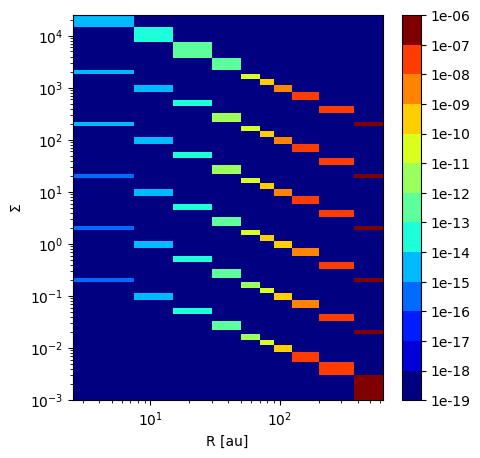

In [12]:
fig, ax =plt.subplots(1, 1, figsize=(5, 5))
bounds = np.logspace(-19, -6, 14)
cmap = mpl.colormaps['jet'].resampled(len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
im1= ax.pcolormesh(r_out_uni, sigma_out,  mdot.T, cmap=cmap, norm=norm)#, locator=ticker.LogLocator())#, cmap='jet')
ax.set_xlabel('R [au]')
ax.set_ylabel(r'$\Sigma$')
ax.set_xscale('log')
ax.set_yscale('log')

cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)

In [59]:
r = data['Disc outer radius [au]'].values
sigma = data['Surface density at disc outer edge [gcm-2]'].values
mdot = 10**(data['Mass loss rate [log10(Msol/yr)]'].values)

In [60]:
r_new = np.linspace(5, r.max(), 500)
sigma_new = np.logspace(np.log10(sigma.min()), np.log10(sigma.max()), 1000)

In [61]:
xx, yy = np.meshgrid(r_new, sigma_new)

In [63]:
interp = LinearNDInterpolator(list(zip(r, sigma)), mdot)

In [64]:
mdot_new = interp(xx, yy).T

In [68]:
for ind, val in enumerate(r_new):

    loc_not_nan = np.where(~np.isnan(mdot_new[ind,:]))
    loc_nan = np.where(np.isnan(mdot_new[ind,:])) # location with (no) interpolate mdot
    if len(loc_not_nan[0])!=0:
        sigma_max = sigma_new[loc_not_nan].max()
        sigma_min = sigma_new[loc_not_nan].min()
        mdot_max  = np.nanmax(mdot_new[ind, :])
        mdot_min  = np.nanmin(mdot_new[ind, :])
        
        
        #print(ind, loc_nan)
        for i in loc_nan[0]:
            if sigma_new[i]>sigma_max:
                mdot_new[ind, i]=mdot_max
            elif sigma_new[i]<sigma_min:
                mdot_new[ind, i]= mdot_min * sigma_new[i]/sigma_min
        #if np.hstack((loc_not_nan, loc_nan))==range(len(r_new)):
        #    print(ind)
    else:
        pass

In [69]:
#mdot_new[np.where(np.isnan(mdot_new))]=1e-20

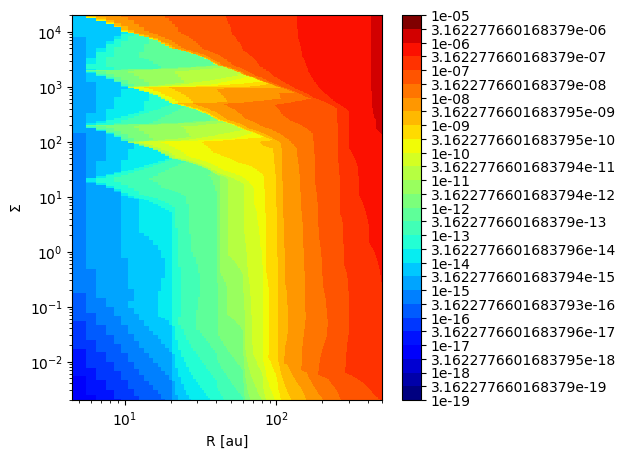

In [74]:
fig, ax =plt.subplots(1, 1, figsize=(5, 5))
bounds = np.logspace(-19, -5, 29)
cmap = mpl.colormaps['jet'].resampled(len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
im1= ax.pcolormesh(r_new, sigma_new, mdot_new.T, cmap=cmap, norm=norm, shading='nearest')#, locator=ticker.LogLocator())#, cmap='jet')
ax.set_xlabel('R [au]')
ax.set_ylabel(r'$\Sigma$')
ax.set_xscale('log')
ax.set_yscale('log')

cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)

In [71]:
mdot_new.max()

1.1901026919080409e-06

In [ ]:
sigma_in

In [ ]:
sigma_ar = np.linspace(sigma_out.min(), sigma_out.max(), 500)

In [ ]:
mdot_intp= np.zeros(len(sigma_ar))

In [ ]:
for i in r_out_uni[1:2]:
    data2 = data[data['Disc outer radius [au]'].values==i]
    sigma_out = data2['Surface density at disc outer edge [gcm-2]'].values
    mdot_out = 10**(data2['Mass loss rate [log10(Msol/yr)]'].values)
    sigma_max = np.max(sigma_out)
    sigma_min = np.min(sigma_out)
    mdot_max = mdot_out.max()
    mdot_min = mdot_out.min()
    for j, sigma in enumerate(sigma_ar):
        if sigma >= sigma_max:
            mdot_intp[j]= mdot_max
        elif sigma < sigma_min:
            mdot_intp[j] = sigma/sigma_min * mdot_min
        # linear interpolation between this???

In [ ]:
sigma_max, sigma_min

In [ ]:
data2

In [ ]:
mdot_intp

In [ ]:
len(r_out_uni), len(sigma_in)

In [ ]:
mdot_ar = np.zeros((len(r_out_uni), len(sigma_in)))

In [ ]:
for ind_i, i in enumerate(sigma_in):
    for ind_j, j in enumerate(r_out_uni):
        data2 = data[(data['Surface density at 1au [gcm-2]'].values==i) & (data['Disc outer radius [au]'].values==j)]
        mdot = 10 ** data2['Mass loss rate [log10(Msol/yr)]'].values[0]
        #print(mdot)
        mdot_ar[ind_j, ind_i] = mdot

In [ ]:
mdot_ar.shape

In [ ]:
plt.contourf(r_out_uni, sigma_in, mdot_ar.T, cmap='jet')
plt.xscale('log')
plt.yscale('log')

In [ ]:
for i in sigma_in[0:1]:
    data1 = data[data['Surface density at 1au [gcm-2]'].values==i]
    plt.scatter(data1['Disc outer radius [au]'].values, 10**(data1['Mass loss rate [log10(Msol/yr)]'].values))
plt.xlabel('R [au]')
plt.ylabel('Mdot')
plt.yscale('log')
plt.xscale('log')

In [ ]:
r_out = data['Disc outer radius [au]'].values[0]
sigma_out = data['Surface density at disc outer edge [gcm-2]'].values[0]

In [ ]:
r_out, sigma_out

In [ ]:
def disc_in(r_in, r_out, sigma_out, N=1000):
    '''estimate the surface density between R_in and R_out.

     The default number of cells is 1000.
    
    '''
    r = np.linspace(r_in, r_out, N)
    sigma_r = (r/r_out) ** (-1) * sigma_out

    return r, sigma_r

In [ ]:
r, sigma_r = disc_in(1, r_out, sigma_out, N=1000)

In [ ]:
def Mdot_estimate(sigma_r, sigma_out, mdot_out):

    '''estimate the mass-loss rate (Eq.5 in Sellek et al (2020))'''

    mdot = sigma_r/sigma_out 

In [ ]:
def Mdot_r(r, sigma_r, r_out, sigma_out, mdot_out):

    '''
    estimate the local mass rate from the sigma and mass-loss 
    rate at the outermost cell.
    '''
    
    np.where(sigma_r>sigma_out,  , mdot_out)

In [ ]:
data_y = data['Surface density at 1au [gcm-2]']

In [ ]:
def Mdot_r_s(sigma, )